In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import scipy.special as spec
import scipy.constants as const
import matplotlib.pyplot as plt

initial problem description: https://balitsky.com/teaching/phys420/finalproject_2.pdf 

possible references:

https://www.nature.com/articles/179552b0.pdf

https://www.tandfonline.com/doi/pdf/10.1080/00223131.2000.10874837

http://www-star.st-and.ac.uk/~kw25/teaching/mcrt/MC_history_3.pdf

S. Ulam, R. D. Richtmyer, and J. von Neumann. 1947. Statistical methods in neutron diffusion. Los Alamos Scientific Laboratory report LAMS–551 (https://permalink.lanl.gov/object/tr?what=info:lanl-repo/lareport/LA-00551-MS)

https://arxiv.org/pdf/2012.02864.pdf

https://www.youtube.com/watch?v=3yqpirzxudw

<!-- on a first (naive) approach, we will get simple data from wiki: neutron cross section -->
<!-- if one desires, more realistic data can be obtained in links below  -->
<!-- data https://www.oecd-nea.org/dbdata/nds_jefreports/jefreport-3.pdf  -->
<!-- https://www.nndc.bnl.gov/sigma/index.jsp  -->

#### particle production
- initial energy distribution $\chi$ of neutrons generated by the reactor (neutron birth spectrum)
    - probability distribution bounded between [1MeV, 10MeV] (ballpark values)
    
    $$ \chi(\epsilon) = 0.4865 \cdot \sinh(\sqrt{2\epsilon}) \, e^{-\epsilon} \,\, \text{MeV}^{-1} $$

- neutron multiplication $\nu$ (average number of neutrons produced during each fission event)

#### types of interaction with matter
- scattering cross section $\Sigma_{s}$
    - change in energy $$ \epsilon \longrightarrow \epsilon^{\prime} = \epsilon \hspace{1.5pt} F_{\text{material}}(\varphi) $$ $\varphi$ random number representing the scattering angle
    
    $$ F_{\text{material}}(\varphi) = \left( \frac{\alpha - 1}{\pi} \right) |\varphi| + 1 \hspace{2.2cm} \alpha \equiv \left(\frac{A - 1}{A + 1}\right)^{2} \hspace{2cm} \varphi \sim \text{Uniform}(-\pi, \pi) $$
    
    $A$ being the atomic mass of atoms in the medium material
- absortion cross section $\Sigma_{a}$
    - various outcomes in this case, but we are going with capture only $$ \epsilon \longrightarrow \epsilon^{\prime} = 0 $$
- fission cross section $\Sigma_{f}$
    - birth of particles 🍼
- decay $\lambda$ (alone, neutrons are not stable; they have a half-life of about 12 minutes)
- neutron-neutron interactions (very small probability, but non-zero; mean free path $\sim 10^{8}$ cm)

#### material layers & functionalities
Fuel: U-235, U-238, Pu-239

Moderator: H-1, H-2, C-12

Absorber: B-10, Cd-113, Xe-135, In-115

Structural materials, others: Au-197, Zr-90, Fe-56, Cr-52, Co-59, Ni-58, O-16


In [2]:
cs_df = pd.read_csv('nuclides_cs.csv')
cs_df

,nuclide,atom mass (u),density (g/cm3),utility,thermal_sigma_s (barn),thermal_sigma_c (barn),thermal_sigma_f (barn),fast_sigma_s (barn),fast_sigma_c (barn),fast_sigma_f (barn)
0,H-1,1.007825,0.000082,moderator,20.0,2.000000e-01,0.00000,4,4.000000e-05,0.0
1,H-2,2.014102,0.000082,moderator,4.0,3.000000e-04,0.00000,3,7.000000e-06,0.0
2,C-12,12.000000,2.200000,moderator,5.0,2.000000e-03,0.00000,2,1.000000e-05,0.0
3,Au-197,196.966552,19.300000,structural & others,8.2,9.870000e+01,0.00000,4,8.000000e-02,0.0
4,Zr-90,89.904704,6.520000,structural & others,5.0,6.000000e-03,0.00000,5,6.000000e-03,0.0
5,Fe-56,55.934942,7.870000,structural & others,10.0,2.000000e+00,0.00000,20,3.000000e-03,0.0
6,Cr-52,51.940512,7.150000,structural & others,3.0,5.000000e-01,0.00000,3,2.000000e-03,0.0
7,Co-59,58.933200,8.860000,structural & others,6.0,3.720000e+01,0.00000,4,6.000000e-03,0.0
8,Ni-58,57.935348,8.900000,structural & others,20.0,3.000000e+00,0.00000,3,8.000000e-03,0.0
9,O-16,15.994915,0.001308,structural & others,4.0,1.000000e-04,0.00000,3,3.000000e-08,0.0


In [230]:
class Reactor(object):
    def __init__(self, core_fuel, core_radius, thickness_layers, composition_layers):
        self.fuel = core_fuel
        self.number_layers = len(thickness_layers) + 1
        self.layer_radius = []
        
        self.layer_radius.append(core_radius)
        for k in range(0, self.number_layers - 1):
            self.layer_radius.append(thickness_layers[k] + self.layer_radius[k])
        
        self.materials = list(np.append(np.array(core_fuel), np.array(composition_layers)))

    def neutronBirthSpectrum(self, E):
        if (self.fuel[0:2] == 'U-'):
            return (0.4865 * np.sinh(np.sqrt(2 * E)) * np.exp(-E))
        elif (self.fuel[0:3] == 'Pu-'):
            return # nbs plutonium #
    
    def showSchematics(self):
        for k in range(self.number_layers - 1, -1, -1):
            R = self.layer_radius[k]
            eps = 0.00001
            scheme_x = np.arange(-(R-eps), R-eps, 0.0001)
            aux_R = R * np.ones_like(scheme_x)
            
            scheme_upper_y = np.sqrt(np.power(aux_R, 2) - np.power(scheme_x, 2))
            scheme_lower_y = (-1) * scheme_upper_y
            
            scheme_x = np.append(scheme_x, scheme_x)
            scheme_y = np.append(scheme_lower_y, scheme_upper_y)
            
            plt.plot(scheme_x, scheme_y, color = 'k', zorder = -1)
        
        over_max_radius = max(self.layer_radius) + 0.4
        plt.xlim(xmin = -over_max_radius, xmax = over_max_radius)
        plt.ylim(ymin = -over_max_radius, ymax = over_max_radius)

class Neutron(object):
    def __init__(self, specified_reactor):
        self.reactor = specified_reactor
        
        r_coin = self.reactor.layer_radius[0] * np.random.rand()
        theta_coin = 2 * np.pi * np.random.rand()
        init_x = r_coin * np.cos(theta_coin)
        init_y = r_coin * np.sin(theta_coin)
        self.pos = [init_x, init_y] # cartesian coordinates
        
        self.angle = self.randomAngle() # deviation angle (varphi) wrt the radial direction
        self.energy = self.startingEnergy(self.reactor)
        
        self.fissioned = False
        self.path_x = [init_x]
        self.path_y = [init_y]
        
    def update(self):
        step_length = 0.1 #0.01
        current_medium = self.reactor.fuel
        # only moves when energy is greater than zero or current_medium != 'Escaped' ↓
        while ((self.energy > 0) and (not self.fissioned) and (current_medium != 'Escaped')):
            self.pos[0] += step_length * np.cos(self.angle)
            self.pos[1] += step_length * np.sin(self.angle)
            
            current_radius = self.getRadius()
            current_medium = self.getMaterial(current_radius, self.reactor)
            
            if (current_medium == 'Escaped'):
                self.path_x.append(self.pos[0])
                self.path_y.append(self.pos[1])
                break
            
            cm_indx = (cs_df['nuclide'].to_list()).index(current_medium)

            fast_cross_sections = (cs_df[['fast_sigma_s (barn)',
                                          'fast_sigma_f (barn)',
                                          'fast_sigma_c (barn)']].iloc[cm_indx]).to_list()

            sigma_s = fast_cross_sections[0]
            sigma_f = fast_cross_sections[1]
            sigma_c = fast_cross_sections[2]
            total_sigma = sum(fast_cross_sections)

            xi_dice = np.random.rand()

            if (xi_dice <= sigma_s / total_sigma):
                # scattering
                atomic_mass = cs_df['atom mass (u)'][cm_indx]
                alpha = ((atomic_mass - 1) / (atomic_mass + 1))**2

                delta_phi = self.randomAngle()
                F_material = (((alpha - 1) / np.pi) * np.abs(delta_phi)) + 1

                self.energy = F_material * self.energy
                self.angle += delta_phi
            elif (xi_dice > sigma_s / total_sigma and xi_dice <= (sigma_s + sigma_f) / total_sigma):
                # fission
                # outcome is modeled within Reactor class
                self.fissioned = True
            else:
                # absorption (capture, specifically)
                self.energy = 0

            self.path_x.append(self.pos[0])
            self.path_y.append(self.pos[1])
        
    def visuals(self):
        # maybe implement random colors from a specific list (?)
        plt.plot(self.path_x, self.path_y, alpha = 0.6, linestyle = 'solid')#, marker = '.')
    
    def getRadius(self):
        return np.sqrt(self.pos[0]**2 + self.pos[1]**2)
    
    def getMaterial(self, particle_radial_pos, working_reactor):
        for layer_rad in working_reactor.layer_radius:
            if (particle_radial_pos < layer_rad):
                indx = working_reactor.layer_radius.index(layer_rad)
                return working_reactor.materials[indx]
        
        return 'Escaped'
    
    def randomAngle(self):
        return ((2*np.pi * np.random.rand()) - np.pi)
        
    def startingEnergy(self, react_object):
        xi = 1
        candidate_energy = 0
        
        while (xi > react_object.neutronBirthSpectrum(candidate_energy)):
            candidate_energy = 12 * np.random.rand()
            xi = 0.5 * np.random.rand()
        
        return candidate_energy

In [391]:
some_reactor = Reactor(core_fuel = 'U-235', core_radius = 0.075,
                       thickness_layers = [2, 1.5], composition_layers = ['H-2', 'B-10'])

neutron_list = []
for j in range(0, 100):
    neutron_list.append(Neutron(specified_reactor = some_reactor))

# neutron_list

100
69
59
59
58
49
41
30
22
17
12
15
10
8
9
5
8
7
7
8
7
4
3
2
1
0


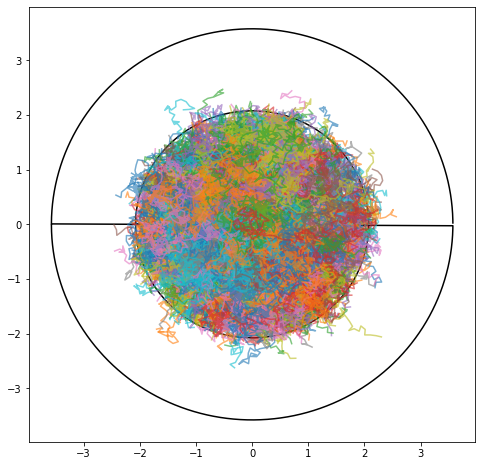

In [392]:
plt.figure(figsize = (8, 8))

while (len(neutron_list) > 0 and len(neutron_list) < 200):
    print(len(neutron_list))
    for particle in neutron_list:
        particle.update()
        particle.visuals()

        if (particle.fissioned):
            fission_event_x = particle.pos[0]
            fission_event_y = particle.pos[1]
            neutron_list.pop(neutron_list.index(particle))

            for j in range(0, 2):
                new_neutron = Neutron(specified_reactor = some_reactor)
                new_neutron.pos = [fission_event_x, fission_event_y]
                new_neutron.path_x = [fission_event_x]
                new_neutron.path_y = [fission_event_y] 
                neutron_list.append(new_neutron)
        elif (particle.energy == 0 or 
              particle.getMaterial(particle_radial_pos = particle.getRadius(),
                                   working_reactor = some_reactor) == 'Escaped'):
            neutron_list.pop(neutron_list.index(particle))

print(len(neutron_list))
some_reactor.showSchematics()
# plt.grid()